# 2. 파라미터 조정으로 성능 향상하기 

### ch1에서는 간단한 머신러닝의 핵심 프로세스를 살펴보았다. ch2에서는 모델의 성능을 향상시킬 수 있는 다양한 방법에 대해서 확인해본다.

#### (참고) scikit-learn 도움말을 확인하는 방법 --> https://scikit-learn.org 웹사이트를 활용

## 2.1. 기본 파라미터를 사용하기

### 2.2.1. 종양 데이터 셋을 읽기

붓꽃 데이터(iris)는 단순해서 다른 데이터셋을 활용한다. 

  * 분류 데이터셋 (종양 데이터셋): 데이터를 보고서 암인지 아닌지 분류하는 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cancer = pd.read_csv('data/cancer.csv')

### 2.2.2. 데이터를 둘러보기

In [3]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 위 데이터에서 type 데이터 설명 -->  (종양 : 악성malignant/양성benign)

In [4]:
tumor = cancer.values[:,0]

In [5]:
np.unique(tumor)

array(['benign', 'malignant'], dtype=object)

In [6]:
cancer.shape  
  # cancer는 DataFrame 하지만 ndarray의 shape를 DataFrame에서도 쓸 수 있다
  # 특징의 갯수는 31로 보이지만, y값을 빼어야 하므로 30개가 된다

(569, 31)

### 2.2.3. 지도학습 데이터 준비

cancer데이터셋에서 특질(feature)와 타겟변수로 구분하기

In [7]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

In [8]:
X.shape, y.shape

((569, 30), (569,))

train 데이터와 test 데이터로 나누기

In [9]:
from sklearn.model_selection import train_test_split # 훈련, 시험 데이터의 분리

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### 2.2.4. 모델 선택 

종양을 양성과 악성으로 분류해야 하므로 분류기(KNN)를 사용

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier() #  먼저 아무런 파라미터 설정을 하지 않고 기본설정을 사용 (모델의 개체출력을 하면 알 수 있다)

In [13]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 2.2.5. 모델 훈련

In [14]:
model = model.fit(X_train, y_train)

### 2.2.6. 모델 평가

훈련한 모델의 성능을 train데이터와 test데이터로 평가한다

In [15]:
train_score = model.score(X_train, y_train)  # 훈련과 시험을 같이 보는 이유는 과소적합, 과대적합을 판단하려고
test_score = model.score(X_test, y_test)

In [16]:
train_score, test_score

(0.9483568075117371, 0.916083916083916)

훈련과 시험을 반복하면서 설정의 적절함을 찾는 것이다.

train데이터의 성능평가결과 (0.9413145539906104)와 test 데이터의 성능평가결과(0.9370629370629371)가 나왔다. 

결과가 좋은 편이다. 그런데 이 결과가 최적이라고 할 수 있을까? 

위 적합옵션에서 기본값(n_neighbors=5)을 사용했는데, 이웃의 숫자를 바꿔볼 필요는 없을까? 만일 바꾸면 어떤 결과가 나올까?

## 2.2. 파라미터의 변경 (분류)

### 2.2.1. 변경할 파라미터 리스트 생성

####  모델 설정에 따른 성능 평가

"이웃의 숫자에 따라서 점수가 어떻게 바뀔까?"

이웃의 숫자를 리스트로 만들어 둔다

In [17]:
n_range = list(range(1,21))
n_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### 2.2.2. 모델 훈련 및 평가

In [18]:
result = {} # 여러개의 데이터를 저장하는 파이썬의 Dictionary 구조임 {색인:값, 색인:값, ...}
for n_nei in n_range:
    model = KNeighborsClassifier(n_neighbors=n_nei)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    result[n_nei] = {'train' : train_score, 'test' : test_score}

In [19]:
table_train_result = pd.DataFrame(result).T  # .T 는 행과 열을 바꾸는 연산자 (Transpose)
table_train_result

,test,train
1,0.909091,1.000000
2,0.902098,0.953052
3,0.916084,0.950704
4,0.916084,0.950704
5,0.916084,0.948357
6,0.923077,0.948357
7,0.923077,0.946009
8,0.923077,0.941315
9,0.916084,0.953052
10,0.923077,0.946009


### 2.2.3. 평가 결과 시각화

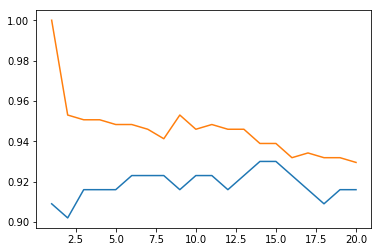

In [20]:
_ = plt.plot(table_train_result)

In [21]:
result

{1: {'train': 1.0, 'test': 0.9090909090909091},
 2: {'train': 0.9530516431924883, 'test': 0.9020979020979021},
 3: {'train': 0.9507042253521126, 'test': 0.916083916083916},
 4: {'train': 0.9507042253521126, 'test': 0.916083916083916},
 5: {'train': 0.9483568075117371, 'test': 0.916083916083916},
 6: {'train': 0.9483568075117371, 'test': 0.9230769230769231},
 7: {'train': 0.9460093896713615, 'test': 0.9230769230769231},
 8: {'train': 0.9413145539906104, 'test': 0.9230769230769231},
 9: {'train': 0.9530516431924883, 'test': 0.916083916083916},
 10: {'train': 0.9460093896713615, 'test': 0.9230769230769231},
 11: {'train': 0.9483568075117371, 'test': 0.9230769230769231},
 12: {'train': 0.9460093896713615, 'test': 0.916083916083916},
 13: {'train': 0.9460093896713615, 'test': 0.9230769230769231},
 14: {'train': 0.9389671361502347, 'test': 0.9300699300699301},
 15: {'train': 0.9389671361502347, 'test': 0.9300699300699301},
 16: {'train': 0.931924882629108, 'test': 0.9230769230769231},
 17: {

In [22]:
result[1]

{'train': 1.0, 'test': 0.9090909090909091}

In [23]:
pd.DataFrame(result)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
test,0.909091,0.902098,0.916084,0.916084,0.916084,0.923077,0.923077,0.923077,0.916084,0.923077,0.923077,0.916084,0.923077,0.930070,0.930070,0.923077,0.916084,0.909091,0.916084,0.916084
train,1.000000,0.953052,0.950704,0.950704,0.948357,0.948357,0.946009,0.941315,0.953052,0.946009,0.948357,0.946009,0.946009,0.938967,0.938967,0.931925,0.934272,0.931925,0.931925,0.929577


### 2.2.4. 그리드 서치

#### (p337) 5.2 그리드 서치

 -> 최고의 조합을 내는 A와 B의 설정을 찾아내는 방법
 -> 모델 튜닝의 방법이 '그리드 서치' 이다
 
 -> 위의 에시처럼 비록 차원이 하나(이웃의 숫자)라 하더라도 이 방법은 그리드 서치의 방법이다

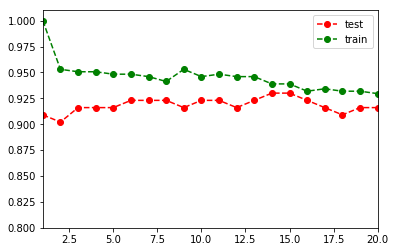

In [24]:
style = {'train' : 'go--', 'test':'ro--'}  # 색상(green), 마커(o), 선스타일(--)
table_train_result.plot(style=style, ylim=(0.8, 1.01))

1. 이웃의 숫자가 1일때 (왼쪽 끝) : 과적합이다 (일반화 능력이 떨어진다)
2. 이웃의 갯수가 늘어나면
  1) 훈련 점수는 낮아진다 (KNN은 이웃의 숫자가 1이면 훈련점수는 1.0에서 시작한다) -> 데이터를 외우고 있어서 자기자신의 거리 0으로 계산되므로
3. 선택하는 방법
  1) test와 train 데이터의 차이가 적고
  2) test의 결과가 큰 것을 찾는다

위는 cancer 데이터에 대해서 분석한 것이고,
아래는 부동산 데이터에 대해서 분석한다

### 2.3. 그리드 서치 (회귀)

### 2.3.1. 회귀 데이터 둘러보기

주어진 데이터에 대해 kNN 모델(회귀)의 최적 설정을 찾아본다

In [25]:
boston = pd.read_csv('data/boston.csv') # boston지역의 부동산 데이터

In [26]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2.3.2. 데이터 준비하기

In [27]:
y = boston.values[:, 0].astype('float32') # 회귀
X = boston.values[:,1:].astype('float32')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### 2.3.3. 모델 훈련 및 평가

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
boston_train_result = {} # 여러개의 데이터를 저장하는 파이썬의 Dictionary 구조임 {색인:값, 색인:값, ...}
for n_nei in range(1,21):
    model = KNeighborsRegressor(n_neighbors=n_nei).fit(X_train,y_train) # 모델을 생성하면서, 바로 fit
        
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    boston_train_result[n_nei] = {'train' : train_score, 'test' : test_score}

In [31]:
table_boston_train_result = pd.DataFrame(boston_train_result).T  # .T 는 행과 열을 바꾸는 연산자 (Transpose)
table_boston_train_result

,test,train
1,0.392862,1.000000
2,0.559662,0.828606
3,0.604872,0.744636
4,0.590152,0.724088
5,0.548812,0.676337
6,0.537787,0.652796
7,0.535441,0.606115
8,0.556940,0.568708
9,0.550371,0.543200
10,0.527965,0.538364


### 2.3.4. 평가 결과 시각화

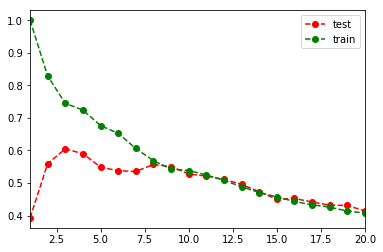

In [32]:
table_boston_train_result.plot(style = style)

위 표에서 ...

훈련점수의 희생이 있으면, 시험점수의 상승이 필요하다.

간격을 좁히는 것이 중요하다.

과적합을 줄일지(간격을 줄일지), 테스트의 정확성이 높은 것을 선택할지는 각 분석의 목적과 상황에 따라서 다르다

In [33]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9],
      dtype=float32)

In [34]:
X[:10] # 데이터의 표기법만 다른 것임 (pandas 와 ndarray의 표기가 달라서이지-> 지수승으로 표기, 정규화된 것은 아님)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [34]:
boston.values.shape

(506, 14)

In [35]:
boston.shape

(506, 14)

# 요약 (p171)

##  kNN은 현업에서 잘 쓰지 않는 모델이지만, 다음과 같은 개념을 익히기 위해서 사용했다

 1. 과소적합, 과대적합
 2. 모델의 평가

## 다음 장(ch3)에서는 다양한 모델로 분석을 하고 모델의 성능을 파라미터 설정 외에 다양한 방법으로 향상시키는 방법을 확인할 것이다.